# Stochastic Process

A **stochastic process** is a **mathematical object** defined as a collection of **random variables** indexed by **time**. 

Formally, a stochastic process $\{X_t : t \in T\}$ is a family of random variables where:

- Each $X_t$ is a random variable representing the **state** of the system at time $t$
- $T$ is the **index set**, which can be **discrete** (e.g., $T = \{0, 1, 2, \ldots\}$) or **continuous** (e.g., $T = [0, \infty)$)
- The process captures the **evolution** of the system as it changes over time

A stochastic process can be either **Markovian** or **Non-Markovian**. 

### Markovian Process
A **Markovian process** satisfies the memoryless property:

$$P(X_t \mid X_{s_1}, X_{s_2}, \ldots, X_{s_n}) = P(X_t \mid X_{s_n})$$

for all $s_1 < s_2 < \cdots < s_n < t$, where the future state depends only on the **current state**, not on the history.

### Non-Markovian Process
A **non-Markovian process** does not satisfy the Markov property:

$$P(X_t \mid X_{s_1}, X_{s_2}, \ldots, X_{s_n}) \neq P(X_t \mid X_{s_n})$$

where the future state is affected by both **current and previous states**.

For the purpose of this exploration, I will focus on concepts within Markovian processes.

---

### Discrete-Time Stochastic Process

A **random walk** is a discrete-time stochastic process where a particle or point moves in a series of steps, with each step determined randomly. 

**Key Properties:**
- **Discrete time and space**: Steps occur at fixed, uniform time intervals
- **IID steps**: The increments are typically identically distributed random variables

**Mathematical formulation:**
Let $\{Z_i\}$ be a sequence of IID random variables representing the steps. The position at time $n$ is:

$$S_n = S_0 + \sum_{i=1}^{n} Z_i$$

**Special case - Symmetric Random Walk:**
When $P(Z_i = +1) = P(Z_i = -1) = \frac{1}{2}$, the random walk is called symmetric.

**Asymptotic behavior:**
By the Central Limit Theorem, the position after many steps becomes approximately normally distributed, even though the individual steps themselves are not normally distributed. The mean position grows linearly with the number of steps, while the spread (standard deviation) grows with the square root of the number of steps.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walk(t, N, interval=[-1, 1]):
    """
    Generates and plots a discrete random walk.

    Parameters:
    t (int): Total time
    N (int): Number of random walk paths.
    interval (int, optional): The interval size for each random walk step (default is [-1, 1]).
    
    """
    # Generate random steps (+1 or -1) for each path
    steps = np.random.choice(interval, size=(N, t)).T
    
    # Add the starting point (0) to each path
    origin = np.zeros((1,N))

    # Calculate the cumulative sum of steps to generate the random walk
    walk = np.concatenate([origin, steps]).cumsum(axis=0)
    
    # Plot the random walk paths
    plt.figure(figsize=(10, 6))
    plt.plot(walk, 'o-', lw=1)
    plt.title(f'Discrete Random Walk: {N} Paths, Interval {interval}')
    plt.xlabel('Time, t')
    plt.ylabel('Position, $X_t$')
    plt.grid(True)
  
    plt.show()

#### Random Walk 

A discrete-time process where the position is the cumulative sum of IID random steps: $S_n = S_0 + \sum_{i=1}^{n} Z_i$. In this implementation, each step $Z_i$ follows a **discrete uniform distribution** over the specified interval.

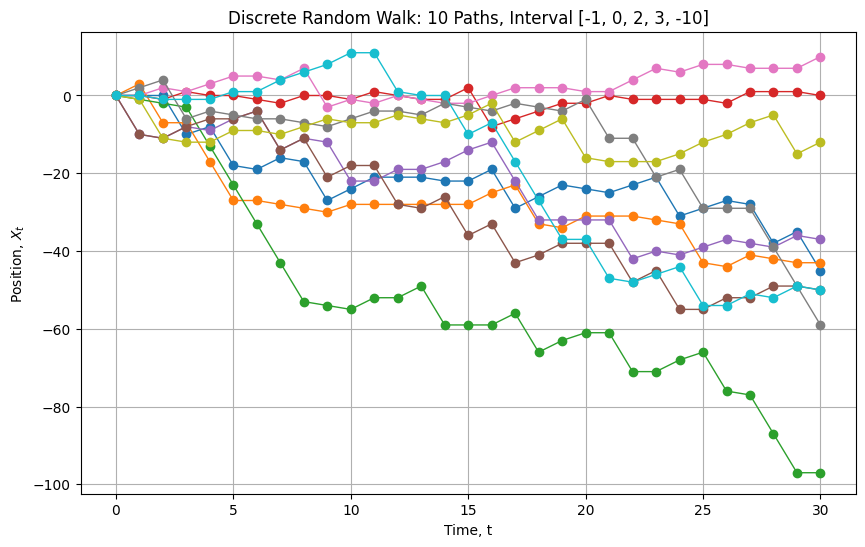

In [40]:
# Random Walk: Use other interval [-1, 3]
generate_random_walk(t=30, N=10, interval=[-1,0,2,3,-10])

#### Simple Symmetric Random Walk 

A special case where:
- **Simple**: Steps are only $\{-1, +1\}$
- **Symmetric**: $P(Z_i = +1) = P(Z_i = -1) = 0.5$

This gives zero mean ($E[Z_i] = 0$) and no directional bias.

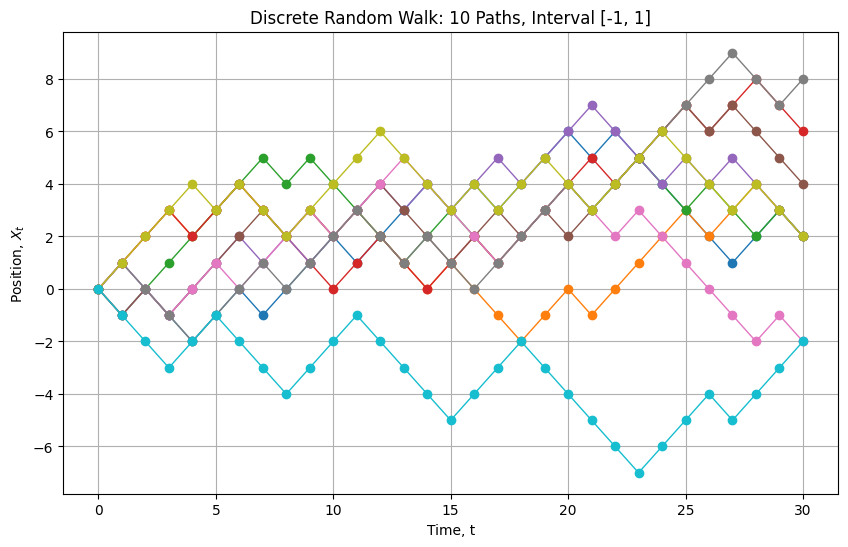

In [14]:
# Symmetric Random Walk , each step moves +1 or −1
generate_random_walk(t=30, N=10, interval=[-1,1])  

---

### Continuous-Time Stochastic Processes

#### Brownian Motion / Wiener Process

**Brownian motion** and **Wiener process** refer to the same mathematical object, though they emphasize different perspectives:
- **Brownian motion**: The physical phenomenon of random particle movement
- **Wiener process**: The rigorous mathematical formulation

In [52]:
import numpy as np
import plotly.graph_objects as go

def interactive_brownian_particle(n_steps=500, step_size=0.1):
    """
    Interactive visualization of a single particle undergoing Brownian motion.
    
    Parameters:
    n_steps (int): Number of time steps
    step_size (float): Size of each random step
    """
    # Generate the full trajectory
    dx = np.random.normal(0, step_size, n_steps)
    dy = np.random.normal(0, step_size, n_steps)
    
    x = np.cumsum(np.insert(dx, 0, 0))
    y = np.cumsum(np.insert(dy, 0, 0))
    
    # Calculate symmetric axis limits
    max_range = max(abs(x).max(), abs(y).max()) + 1
    
    # Create frames for animation
    frames = []
    for i in range(len(x)):
        frames.append(go.Frame(
            data=[go.Scatter(
                x=[x[i]], 
                y=[y[i]],
                mode='markers',
                marker=dict(size=15, color='rgba(0,0,139,0)', 
                           line=dict(width=2, color='darkblue')),
                showlegend=False
            )],
            name=str(i)
        ))
    
    # Initial figure
    fig = go.Figure(
        data=[go.Scatter(
            x=[x[0]], 
            y=[y[0]],
            mode='markers',
            marker=dict(size=15, color='rgba(0,0,139,0)', 
                       line=dict(width=2, color='darkblue')),
            showlegend=False
        )],
        frames=frames
    )
    
    # Clean layout with symmetric axes - horizontal rectangle
    fig.update_layout(
        width=1000,
        height=600,
        title={
            'text': 'Physical Brownian Motion: Particle in 2D Space',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis=dict(
            title='X Position',
            range=[-max_range, max_range],
            showgrid=True,
            zeroline=True,
            zerolinewidth=1,
            zerolinecolor='gray'
        ),
        yaxis=dict(
            title='Y Position',
            range=[-max_range, max_range],
            scaleanchor="x",
            scaleratio=1,
            showgrid=True,
            zeroline=True,
            zerolinewidth=1,
            zerolinecolor='gray'
        ),
        margin=dict(l=60, r=60, t=80, b=120),
        sliders=[{
            'steps': [
                {
                    'args': [[f.name], {'frame': {'duration': 0}, 'mode': 'immediate'}],
                    'label': str(i),
                    'method': 'animate'
                }
                for i, f in enumerate(frames)
            ],
            'active': 0,
            'y': -0.15,
            'len': 0.85,
            'x': 0.075,
            'currentvalue': {
                'prefix': 'Time: ',
                'visible': True,
                'xanchor': 'center',
                'font': {'size': 14}
            }
        }]
    )
    
    fig.show()

# Run simulation
interactive_brownian_particle(n_steps=100, step_size=0.15)

**Wiener process** $W(t)$ is a continuous-time stochastic process with the following properties:

1. **Starts at zero**: $W(0) = 0$
2. **Continuous paths**: $W(t)$ is continuous in $t$ (no jumps)
3. **Stationary and independent increments**: The increment $W(t) - W(s)$ for $0 \leq s < t$ depends only on the time difference $(t-s)$, and non-overlapping increments are independent
4. **Normal increments**: $W(t) - W(s) \sim N(0, t-s)$ for $0 \leq s < t$